#### Libraries

In [1]:
# linear algebra
import numpy as np                 

#visualization
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from prettytable import PrettyTable

# Exercise 1: Analytical exercises

### First point

Show that
$$
\frac{\partial \left (\mathbf{a}^T \mathbf{x} \right)}{\partial \mathbf{x}} = \mathbf{a}^T
$$
where $\mathbf{a}$ and $\mathbf{x}$ are vectors of length $n$.


First, we can see that $\mathbf{a}^T \mathbf{x}$ represents a scalar, given the dimensions of the two vectors involved in the dot product. For this reason, we will expect a row vector as the final result.

We start by converting the above matrix notation to scalar notation
$$
\alpha = \mathbf{a}^T \mathbf{x} = \sum_{i = 0}^{n - 1} a_i x_i
$$
So we can rewrite the above derivative as
$$
\frac{\partial \alpha}{\partial x_k} = \frac{\partial}{\partial x_k} \left( \sum_{i=1}^n a_i x_i \right) = a_k
$$
$\forall k = 0, 1, \dots, n - 1$

We can consider $a_k$ as an element of the vector $\mathbf{a}^T$, because as we said at the beginning, we expect a row vector as a final result, so by generalizing the obtained result, we are able to show that
$$
\frac{\partial \left (\mathbf{a}^T \mathbf{x} \right)}{\partial \mathbf{x}} = \mathbf{a}^T
$$

### Second point

Show that
$$
\frac{\partial \left( \mathbf{a}^T \mathbf{A} \mathbf{a} \right)}{\partial \mathbf{a}} = \mathbf{a}^T \left( \mathbf{A} + \mathbf{A}^T \right)
$$
We can immediately appreciate how $\mathbf{a}^T \mathbf{A} \mathbf{a}$ represents a scalar, so even in this case we are going to expect a row vector as a final result.

Using the scalar notation we can write
$$
\alpha = \mathbf{a}^T \mathbf{A} \mathbf{a} = \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} a_i a_{ij} a_j,
$$
Where $a_i$ and $a_j$ are components of the vector $\mathbf{a}$, while $a_{ij}$ js a component of the matrix $\mathbf{A}$.

If we differentiate $\alpha$ with a component $a_k$, we have two different cases to analyze:

- **Case 1: When i = k**

For each $j$, the term $a_k a_{kj} a_j$ is present in the sum. The derivative of this term with respect to $a_k$ is:

$$
\frac{\partial}{\partial a_k}(a_k a_{kj} a_j) = a_{kj} a_j
$$

- **Case 2: When j = k**

Similarly, for each $i$, the term $a_i a_{ik} a_k$ is present in the sum. The derivative of this term with respect to $a_k$ is:

$$
\frac{\partial}{\partial a_k}(a_i a_{ik} a_k) = a_i a_{ik}
$$

By combining the results of these two cases, we obtain the total derivative of $\alpha$ with respect to $a_k$
$$
\frac{\partial \alpha}{\partial a_k} = \sum_{j=0}^{n-1} a_{kj} a_j + \sum_{i=0}^{n-1} a_{ik} a_i
$$
To generalize the above equation, we can use matrix notation
$$
\frac{\partial \alpha}{\partial a} = \mathbf{A}^T \mathbf{a} + \mathbf{A} \mathbf{a} = (\mathbf{A}^T + \mathbf{A}) \mathbf{a}
$$
And by doing a transposition, given that we want to express our result as a row vector, we obtain
$$
\left(\frac{\partial \alpha}{\partial a}\right)^T = \mathbf{a}^T (\mathbf{A}^T + \mathbf{A})
$$

### Third point

Show that
$$
\frac{\partial (\mathbf{x} - \mathbf{A} \mathbf{s})^T (\mathbf{x} - \mathbf{A} \mathbf{s})}{\partial \mathbf{s}} = -2 (\mathbf{x} - \mathbf{A} \mathbf{s})^T \mathbf{A}
$$
and finally find the second derivative of this function with respect to the vector \(\mathbf{s}\).

We can write 
$$
\mathbf{w} = (\mathbf{x} - \mathbf{A} \mathbf{s})
$$
We know that $\mathbf{x}$ and $\mathbf{A}$ don't have $\mathbf{s}$-dependencies, so:
$$
\frac{\partial \mathbf{w}^T \mathbf{w}}{\partial \mathbf{s}} = 2 \mathbf{w}^T \frac{\partial \mathbf{w}}{\partial \mathbf{s}}
$$
Using that $\frac{\partial \mathbf{w}}{\partial \mathbf{s}} = -\mathbf{A}$, we obtain
$$
\frac{\partial \mathbf{w}^T \mathbf{w}}{\partial \mathbf{s}} = -2 \mathbf{w}^T \mathbf{A} = -2 (\mathbf{x} - \mathbf{A} \mathbf{s})^T \mathbf{A}
$$

Now
\begin{align*}
\frac{\partial^2 (\mathbf{x} - \mathbf{A} \mathbf{s})^T (\mathbf{x} - \mathbf{A} \mathbf{s})}{\partial \mathbf{s} \partial \mathbf{s}} 
& = \frac{\partial}{\partial \mathbf{s}} \left(\frac{\partial (\mathbf{x} - \mathbf{A} \mathbf{s})^T (\mathbf{x} - \mathbf{A} \mathbf{s})}{\partial \mathbf{s}}\right) \\
& = \frac{\partial}{\partial \mathbf{s}} \left(-2 (\mathbf{x} - \mathbf{A} \mathbf{s})^T \mathbf{A}\right) \\
& = \frac{\partial}{\partial \mathbf{s}} \left(-2 \left(\mathbf{x}^T \mathbf{x} - \mathbf{s}^T \mathbf{A}^T \mathbf{A} \mathbf{s}\right)\right) \\
& = \frac{\partial}{\partial \mathbf{s}} \left(2 \mathbf{s}^T \mathbf{A}^T \mathbf{A} \mathbf{s}\right) \\
& = 2 \mathbf{A}^T \mathbf{A}
\end{align*}


# Exercise 2: Making your own data and exploring scikit-learn

In [2]:
# PARAMETERS
n = 100         # Number of elements
p = 3           # Number of features

# INPUT DATA
# We are creating an array of size (n, 1), 
# in which every element is sampled from a uniform distribution over [0, 1).
x = np.random.rand(n, 1)

# OUTPUT DATA
y = 2.0 + 5*x*x + 0.1*np.random.randn(n, 1)

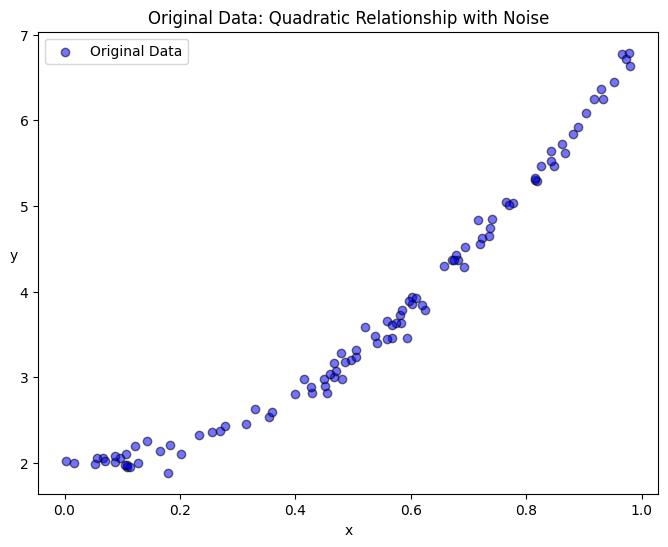

In [3]:
# PLOTTING ORIGINAL DATA
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Original Data')  # Ensure label is correctly set
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Original Data: Quadratic Relationship with Noise')
plt.legend()
plt.show()

## Theory explanation

### Introduction

We have the following quadratic polynomial function:
$$
y(x) = 2 + 5x^2 + \varepsilon
$$
where $\varepsilon$ represents added Gaussian noise.

The output of this function is determined by the value of the variable $x$, that we randomly sampled 100 times from a uniform distribution over $[0, 1)$.

Our goal is to use a **polynomial regression model** to find the best values for $\beta_0$, $\beta_1$, and $\beta_2$ so that the equation 
$$
y = \beta_0 + \beta_1x + \beta_2x^2
$$ 
fits the generated data points as closely as possible.

### The model: Polynomial regression

In general, we can write a polynomial regression model as follows:
$$
\tilde{y}_i =  \sum_{j = 0}^{p - 1} \beta_jx_i^j
$$
Where:

- $\tilde{y}_i$ is the predicted value of $y$ for the $i$-th observation.
- $\beta_j$ are the coefficients of the model.
- $x_i^j$ are the powers of the $i$-th input $x_i$.
- $p$ is the degree of the polynomial plus one.

We can also rewrite the whole equation above using the matrix notation. 

We construct a **design matrix** (also called **feature matrix**) $\mathbf{X}$ where each row corresponds to an observation $x_i$, and each column corresponds to a power of $x_i$ from $x_i^0$ (which is always 1) to $x_i^{p-1}$. 

For a dataset with $n$ observations (data points) and a polynomial of degree $p-1$, the design matrix $\mathbf{X}$ will be an $n \times p$ matrix:
$$
\mathbf{X} = \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^{p-1} \\
1 & x_2 & x_2^2 & \cdots & x_2^{p-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^{p-1}
\end{bmatrix}
$$

Afterwards, we organize the coefficients $\beta_j$ into a column vector $\boldsymbol{\beta}$:
$$
\boldsymbol{\beta} = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_{p-1}
\end{bmatrix}
$$

Finally, the vector of predicted values $\mathbf{\tilde{y}}$ (for all observations) is then:
$$
\mathbf{\tilde{y}} = \begin{bmatrix}
\tilde{y}_1 \\
\tilde{y}_2 \\
\vdots \\
\tilde{y}_n
\end{bmatrix}
= \mathbf{X}\boldsymbol{\beta} 
$$


### Cost function: $\operatorname{MSE}$

In order to evaluate the accuracy of the model, we need to identify a cost function that will help us determine the "*cost*" or "*loss*" associated with a given set of predictions made by the model. Specifically, we will evaluate our model using the **Mean Squared Error** ($\operatorname{MSE}$). We indicate the cost function as $C(\beta)$, because its output is related to the chosen parameters $\beta$:
$$
C(\beta) = \operatorname{MSE} = \frac{1}{n} \sum_{i=0}^{n-1} \left( y_i - \tilde{y}_i \right)^2
$$
Where:
- $n$ is the number of observations.
- $y_i$ is the actual value for the $i$-th observation.
- $\tilde{y_i}$ is the predicted value for the $i$-th observation.

We can rewrite the $\operatorname{MSE}$ equation for our specific case, by expliciting the $\tilde{y}$ variable:
$$
C(\beta) = \operatorname{MSE} = \frac{1}{n} \sum_{i=0}^{n-1} \left(y_i - \sum_{j=0}^{p-1}\beta_jx_i^j \right)^2
$$

Finally, we can formulate the above equation using matrix notation:
$$
C(\beta) = \operatorname{MSE} = \frac{1}{n} \left( \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \right)^\top \left( \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \right)
$$

### Parameter estimation: Least squares

In order to estimate the $\beta$ parameters required by the polynomial regression model, we use the well-known **least squares method**.

We call optimal $\boldsymbol{\beta}$, denoted by $\hat{\boldsymbol{\beta}}$, the column vector that minimizes the cost function $C(\beta)$:

$$
\frac{\partial C}{\partial \boldsymbol{\beta}} = 0 = -\frac{2}{n} \mathbf{X}^\top \left( \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \right) \implies \hat{\boldsymbol{\beta}} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$

After having introduced all the necessary equations, we can move on to the actual resolution of the exercise.

### Code solution

In [4]:
def matrix_creation(n, p):                              # n represents the number of rows (observations), 
                                                        # while p represents the number of columns (features)
    X = np.ones((n, p))
    for i in range(len(x)):
        for j in range(p):
            X[i,j] = X[i,j] * (x[i]**j).item()
    return X

In [5]:
X = matrix_creation(n,p)

In [6]:
beta = np.linalg.pinv(X.T @ X) @ X.T @ y
beta

array([[1.97974387],
       [0.07236072],
       [4.94159633]])

In [7]:
y_tilde = X @ beta

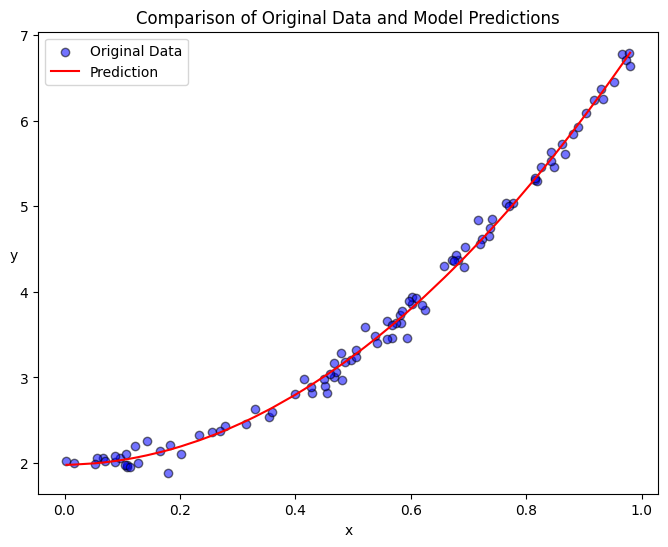

In [8]:
x_sorted = np.sort(x, axis=0)                      
y_tilde_sorted = np.sort(y_tilde, axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Original Data')
plt.plot(x_sorted, y_tilde_sorted, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Comparison of Original Data and Model Predictions')
plt.legend()
plt.show()

### Mean squared error and $R^2$

In [9]:
def mse_and_r2(y_real, y_pred):
    
    mse = 1/n * (y_real - y_pred).T @ (y_real - y_pred)
    
    RSS = (y_real - y_pred).T @ (y_real - y_pred)                   
    TSS = y_real.T @ y_real - 1/n * (y_real.T @ np.ones(y_real.shape[0])) * (np.ones(y_real.shape[0]).T @ y_real)
    r2 = 1 - (RSS/TSS)
    
    print('The mean squared error is:', mse.item()) 
    print('The R2 score is:', r2.item())
    return mse.item(), r2.item()

In [10]:
mse, r2 = mse_and_r2(y, y_tilde)

The mean squared error is: 0.00936138735812999
The R2 score is: 0.9953407033541902


### Scikit-learn

In [11]:
model = make_pipeline(PolynomialFeatures(degree = 2, include_bias = True), LinearRegression(fit_intercept = False)) 

model.fit(x, y)

beta_sklearn = model.named_steps['linearregression'].coef_

print("Scikit-learn computation of parameters:", beta_sklearn)

Scikit-learn computation of parameters: [[1.97974387 0.07236072 4.94159633]]


In [12]:
y_tilde_sklearn = X @ beta_sklearn.T

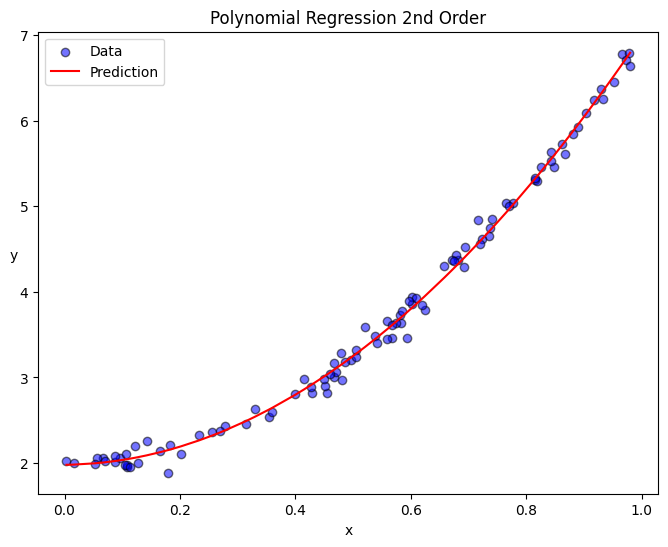

In [13]:
x_sorted = np.sort(x, axis=0)                      
y_tilde_sklearn_sorted = np.sort(y_tilde_sklearn, axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Data')
plt.plot(x_sorted, y_tilde_sklearn_sorted, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Polynomial Regression 2nd Order')
plt.legend()
plt.show()

In [14]:
def mse_and_r2_sklearn(y_real, y_tilde_sklearn):
    mse_sklearn = mean_squared_error(y_real, y_tilde_sklearn)
    r2_sklearn = r2_score(y_real, y_tilde_sklearn)
    print('The mean squared error computed with scikit-learn is:', mse_sklearn) 
    print('The R2 score computed with scikit-learn is:', r2_sklearn)
    return mse_sklearn, r2_sklearn

In [15]:
mse_sklearn, r2_sklearn = mse_and_r2_sklearn(y, y_tilde_sklearn)

The mean squared error computed with scikit-learn is: 0.009361387358129991
The R2 score computed with scikit-learn is: 0.9953407033541902


In [16]:
betas = []
betas.append(beta.T.tolist()[0])
betas.append(beta_sklearn.tolist()[0])

result_table = PrettyTable()

field_names = ["", "Our code", "Scikit-learn"]
result_table.field_names = field_names

names = ["Intercept", "Beta_1", "Beta_2"]
for i in range(len(betas[0])):
    b = []
    for j in range(len(betas)):
        b.append(betas[j][i])
    beta_row = [names[i]] + b
    result_table.add_row(beta_row)

divider_row = ['-' * 20] * len(field_names)
result_table.add_row(divider_row)

mse_row = ["Mean Squared Error", mse, mse_sklearn]
result_table.add_row(mse_row)
r2_row = ["R2 score", r2, r2_sklearn]
result_table.add_row(r2_row)
print(result_table)

+----------------------+----------------------+----------------------+
|                      |       Our code       |     Scikit-learn     |
+----------------------+----------------------+----------------------+
|      Intercept       |  1.9797438698019416  |  1.979743869801882   |
|        Beta_1        | 0.07236071780904663  | 0.07236071780932773  |
|        Beta_2        |   4.94159632562409   |  4.941596325623809   |
| -------------------- | -------------------- | -------------------- |
|  Mean Squared Error  | 0.00936138735812999  | 0.009361387358129991 |
|       R2 score       |  0.9953407033541902  |  0.9953407033541902  |
+----------------------+----------------------+----------------------+


**Discussion of the results**

A negligible difference in the calculated errors and $\beta$ parameters can be appreciated, given the numerical instability expected when doing computations on a PC. This shows that, especially for this case, our algorithm is comparable to using libraries like Scikit-learn in terms of final results.

### Evaluation of the model with different noises

+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
|        Noise         |         0.1          | 0.25114978281273814  |  0.5807274748411819  |  0.6330411096547729  |  0.680588267103382   |   0.78996993761972   |
+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
|      Intercept       |  1.978669708664757   |  1.8893867085347027  |  1.8400024185737671  |  1.8077377302810973  |  1.9895499521135704  |  1.8511546647327624  |
|        Beta_1        | -0.03897754237355189 | 0.36218242386487054  |  1.1400886544785616  |  1.2378934757335527  | 0.15692748100557674  | 0.01529617925539739  |
|        Beta_2        |  5.117567858043139   |  4.677354167970851   |  3.8392268090481454  |  3.7775611688823707  |  4.655574169019872   |  5.335260289417627   |
| --------------------

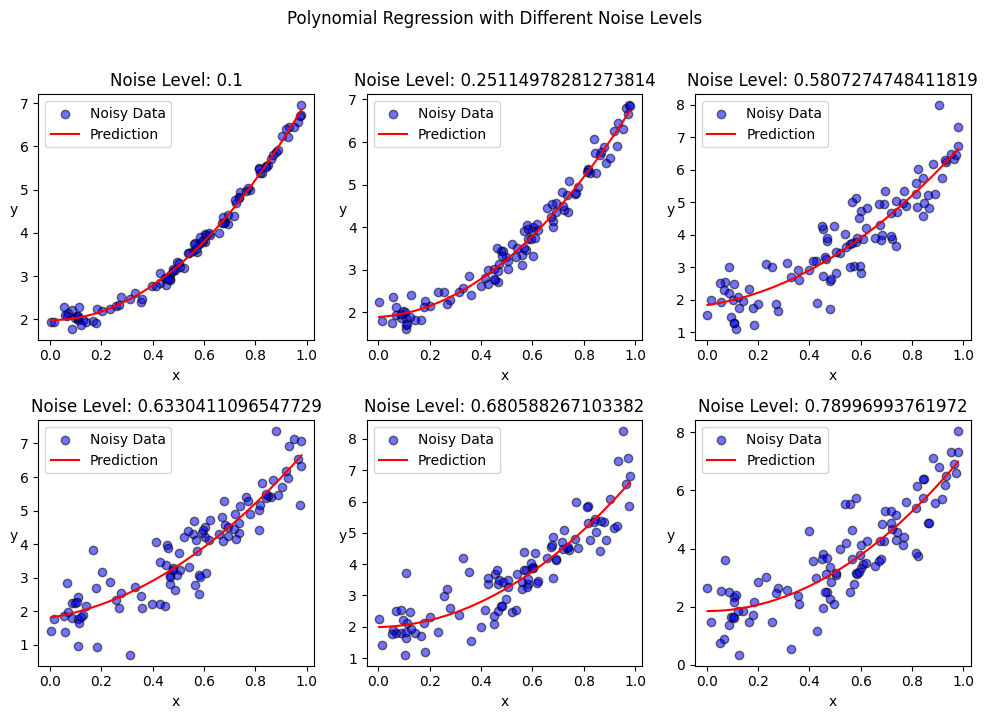

In [17]:
noises = [0.1] + np.unique(np.random.rand(5, 1)).tolist()
betas = []
mse_values = []
r2_values = []

number_row = 2
number_col = int(np.ceil(len(noises)/number_row))
fig, axes = plt.subplots(number_row, number_col, figsize=(10, 7))
axes = axes.flatten()

for i, c in enumerate(noises):
    y = 2.0 + 5*x*x + c*np.random.randn(n, 1)
    model = make_pipeline(PolynomialFeatures(degree = 2, include_bias = True), LinearRegression(fit_intercept = False))
    model.fit(x, y)
    beta_sklearn = model.named_steps['linearregression'].coef_
    betas.append(beta_sklearn.tolist()[0])
    
    y_tilde_sklearn = X @ beta_sklearn.T
    x_sorted = np.sort(x, axis=0)
    y_tilde_sklearn_sorted = np.sort(y_tilde_sklearn, axis=0)
    
    # MSE and R2
    mse = mean_squared_error(y, y_tilde_sklearn)
    r2 = r2_score(y, y_tilde_sklearn)

    mse_values.append(mse)
    r2_values.append(r2)
    
    # Subplot
    ax = axes[i]
    ax.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Noisy Data')
    ax.plot(x_sorted, y_tilde_sklearn_sorted, color='red', label='Prediction')
    ax.set_title(f'Noise Level: {c}')
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation=0)
    ax.legend()


# Table
table = PrettyTable()

field_names = ["Noise"] + [f"{c}" for c in noises]
table.field_names = field_names

names = ["Intercept", "Beta_1", "Beta_2"]
for i in range(len(betas[0])):
    b = []
    for j in range(len(betas)):
        b.append(betas[j][i])
    beta_row = [names[i]] + b
    table.add_row(beta_row)

divider_row = ['-' * 20] * len(field_names)
table.add_row(divider_row)

mse_row = ["Mean Squared Error"] + mse_values
table.add_row(mse_row)
r2_row = ["R2 score"] + r2_values
table.add_row(r2_row)
print(table)


plt.suptitle('Polynomial Regression with Different Noise Levels', y = 1.02)
for j in range(len(noises), number_row * number_col):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

**Discussion regarding the quality of the fits**

We can observe how by increasing the noise the prediction obtained results to be less accurate. We can appreciate this change both from the graphs and the table above, representing the errors for each scenario. In particular, it is interesting to notice how the MSE gets larger for each increase of the noise, showing the decrease in accuracy of our predictive model, while the $R^2$ keeps decreasing, given the increased spread of the data.

# Exercise 3: Split data in test and training data

In [18]:
np.random.seed()
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x - 2)**2) + np.random.normal(0, 0.1, x.shape)

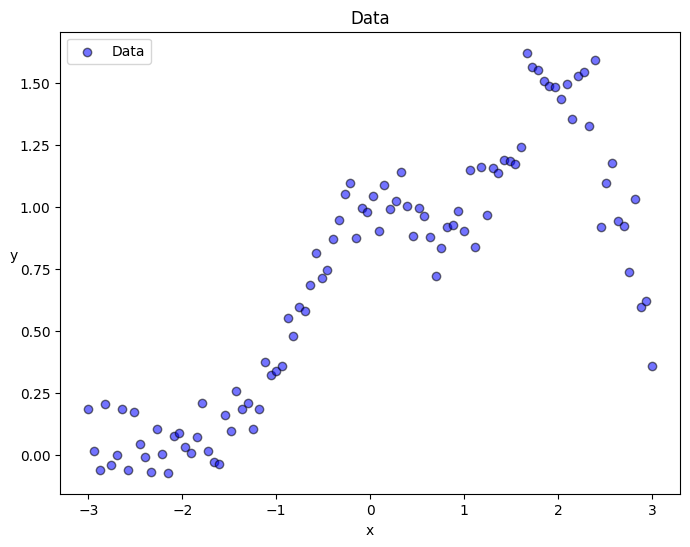

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Data')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Data')
plt.legend()
plt.show()

In [20]:
def split_data(y, n, p, percentage):
    X = matrix_creation(n, p)
    
    train_size = int(X.shape[0] * (percentage / 100))
    portion_X_train = np.random.choice(range(0, X.shape[0]), size = train_size, replace=False)
    portion_X_test = np.setdiff1d(range(0, X.shape[0]), portion_X_train)
    
    X_train = X[portion_X_train]
    X_test = X[portion_X_test]
    y_train = y[portion_X_train]
    y_test = y[portion_X_test]
    
    return X, X_train, X_test, y_train, y_test

In [21]:
p = 6
percentage = 80

In [22]:
model = make_pipeline(PolynomialFeatures(degree = 5), LinearRegression())
X, X_train, X_test, y_train, y_test = split_data(y, n, p, percentage)
model.fit(X_train, y_train)

beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_train_pred = X_train @ beta
y_test_pred = X_test @ beta

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

table_mse_and_r2 = PrettyTable()
table_mse_and_r2.field_names = ["", "MSE", "R2"]
table_mse_and_r2.add_row(["Training set", MSE_train, R2_train])
table_mse_and_r2.add_row(["Testing set", MSE_test, R2_test])
print(table_mse_and_r2)

+--------------+----------------------+--------------------+
|              |         MSE          |         R2         |
+--------------+----------------------+--------------------+
| Training set | 0.020148562395164896 | 0.9212583282484738 |
| Testing set  | 0.03822415285263326  | 0.8520252277793163 |
+--------------+----------------------+--------------------+


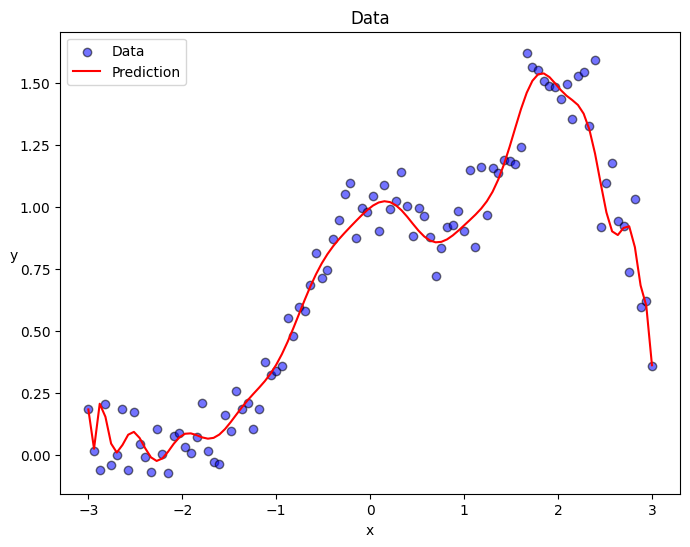

In [23]:
x_sorted = np.sort(x, axis=0)
y_line = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Data')
plt.plot(x_sorted, y_line, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Data')
plt.legend()
plt.show()

### Scikit-learn

In [24]:
X = matrix_creation(n,p)

model = make_pipeline(PolynomialFeatures(degree = 5), LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

MSE_train_sklearn = mean_squared_error(y_train, y_train_pred)
MSE_test_sklearn = mean_squared_error(y_test, y_test_pred)

R2_train_sklearn = r2_score(y_train, y_train_pred)
R2_test_sklearn = r2_score(y_test, y_test_pred)

table_shape = PrettyTable()
table_shape.field_names = ["", "MSE", "R2"]
table_shape.add_row(["Training set", MSE_train_sklearn, R2_train_sklearn])
table_shape.add_row(["Testing set", MSE_test_sklearn, R2_test_sklearn])
print(table_shape)

+--------------+----------------------+---------------------+
|              |         MSE          |          R2         |
+--------------+----------------------+---------------------+
| Training set | 0.006591242671850304 |  0.9733610984232975 |
| Testing set  |  1.8345806552663249  | -4.9831591613782935 |
+--------------+----------------------+---------------------+


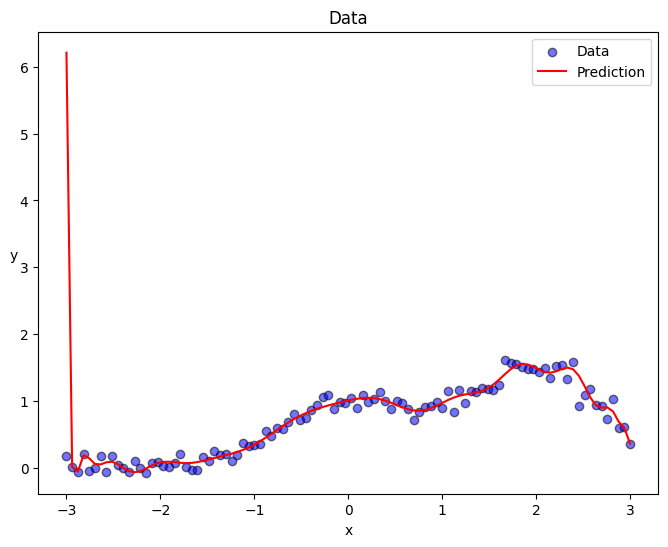

In [25]:
x_sorted = np.sort(x, axis=0)
y_line = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Data')
plt.plot(x_sorted, y_line, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Data')
plt.legend()
plt.show()

In [26]:
result_table = PrettyTable()

field_names = ["", "Our code", "Scikit-learn"]
result_table.field_names = field_names

mse_train_row = ["Mean Squared Error (train)", MSE_train, MSE_train_sklearn]
result_table.add_row(mse_train_row)
mse_test_row = ["Mean Squared Error (test)", MSE_test, MSE_test_sklearn]
result_table.add_row(mse_test_row)
r2_train_row = ["R2 score (train)", R2_train, R2_train_sklearn]
result_table.add_row(r2_train_row)
r2_test_row = ["R2 score (test)", R2_test, R2_test_sklearn]
result_table.add_row(r2_test_row)
print(result_table)

+----------------------------+----------------------+----------------------+
|                            |       Our code       |     Scikit-learn     |
+----------------------------+----------------------+----------------------+
| Mean Squared Error (train) | 0.020148562395164896 | 0.006591242671850304 |
| Mean Squared Error (test)  | 0.03822415285263326  |  1.8345806552663249  |
|      R2 score (train)      |  0.9212583282484738  |  0.9733610984232975  |
|      R2 score (test)       |  0.8520252277793163  | -4.9831591613782935  |
+----------------------------+----------------------+----------------------+


The first code uses a fixed polynomial degree (degree 2) but varies the training and test dataset in each iteration. In contrast, the second code of code explores the impact of different polynomial degrees on a linear regression model while keeping the training and test dataset fixed.

In [27]:
max_degree = 16

MSE_train_values = []
MSE_test_values = []

for p in range(1, max_degree):
    X = matrix_creation(n, p)
    model = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    MSE_train_values.append(MSE_train)
    MSE_test_values.append(MSE_test)

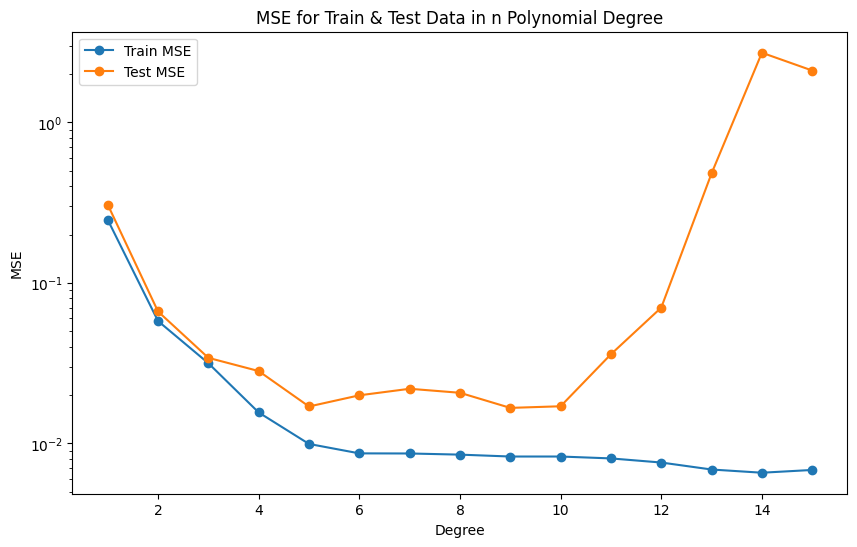

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree), MSE_train_values, label='Train MSE', marker='o')
plt.plot(range(1, max_degree), MSE_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.yscale('log') # to rescale the y-axis
plt.title('MSE for Train & Test Data in n Polynomial Degree')
plt.legend()
plt.show()

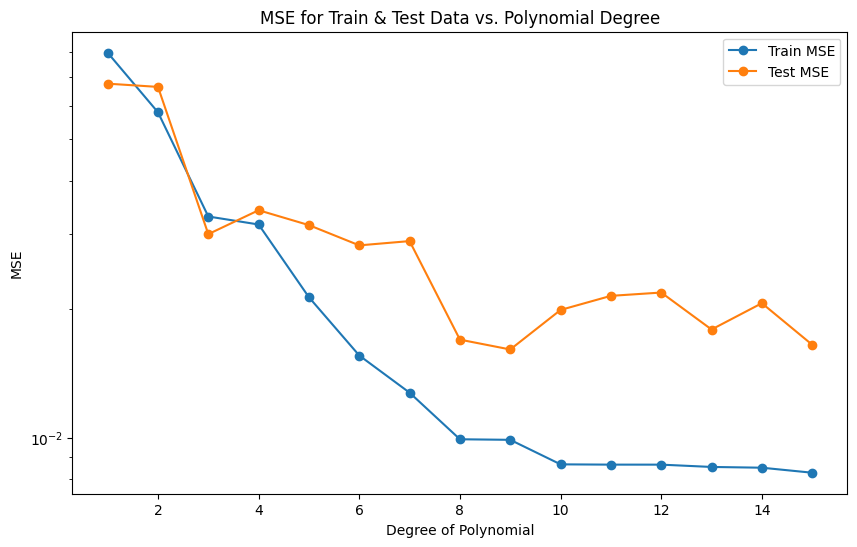

In [29]:
max_degree = 15

# Initializing arrays
mse_train_values = []
mse_test_values = []

# Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Loop iteration
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE', marker='o')
plt.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.title('MSE for Train & Test Data vs. Polynomial Degree')
plt.yscale('log')
plt.legend()
plt.show()

<!-- ![Screenshot 2024-08-28 alle 14.08.26.png](<attachment:Screenshot 2024-08-28 alle 14.08.26.png>) -->

Figure 2.11 of Hastie et al. *Test and training error as a function of model complexity.*


Given the limited number of observations used in our model, the resulting plot does not fully resemble Figure 2.11 of Hastie et al. However, we could argue that the underlying intuition remains: it is still possible to see the expected U-shape that characterizes the behavior of $\operatorname{MSE}$ on the test data as the polynomial degree changes.
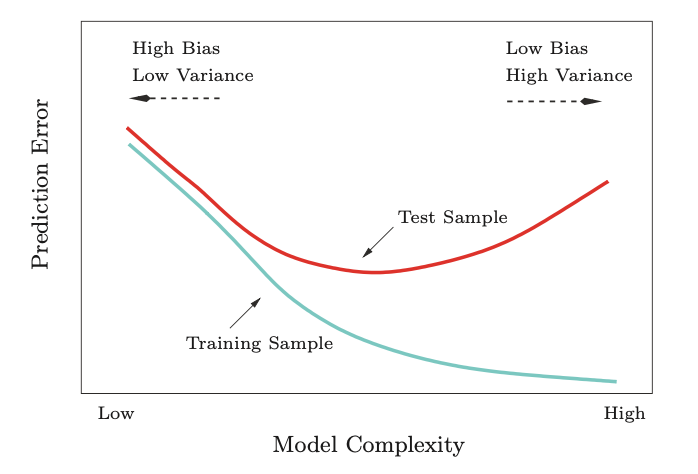

In [30]:
# Finding the optimal degree with the smallest test MSE

min_degree = np.argmin(MSE_test_values) + 1
print(f'By looking at the above plot, we would suggest to take a polynomial degree higher than {min_degree} to accurately fit the data.')

By looking at the above plot, we would suggest to take a polynomial degree higher than 9 to accurately fit the data.
